In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
carDF = pd.read_csv('../data/auto-mpg.csv', header=None)
carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

carDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
labels = ['USA','EU','KOR']

x = [carDF[carDF['origin'] == 1]['mpg'],
carDF[carDF['origin'] == 2]['mpg'],
carDF[carDF['origin'] == 3]['mpg']]

x

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

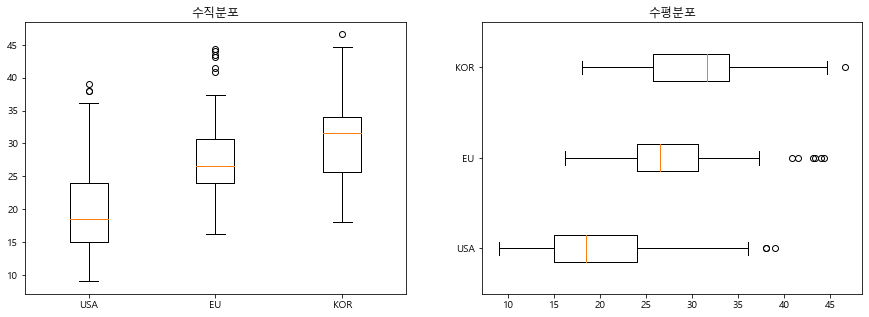

In [5]:
# 제조국가별 연비분포(수직, 수평)

fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.boxplot(x, labels=labels)
ax02.boxplot(x, labels=labels, vert=False)

ax01.set_title('수직분포')
ax02.set_title('수평분포')

plt.show()
plt.close()

### 문제01]
- 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
- 배기량이 4 이하인 자동차와 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 높은지 알아보자

In [36]:
xls = pd.ExcelFile('../data/car_mpg.xlsx')
carDF = xls.parse(xls.sheet_names[0])
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [22]:
displ_4 = carDF[carDF['displ'] <= 4]['hwy'].mean()
displ_5 = carDF[carDF['displ'] >= 5]['hwy'].mean()
print('배기량이 4 이하인 자동차의 고속도로 연비 평균은 {}이고, 5 이상인 자동차의 고속도로 연비 평균은 {}이다.'.format(displ_4, displ_5))

배기량이 4 이하인 자동차의 고속도로 연비 평균은 25.96319018404908이고, 5 이상인 자동차의 고속도로 연비 평균은 18.07894736842105이다.


In [50]:
displ = carDF.groupby(carDF.displ).agg(np.mean).loc[:, 'hwy']

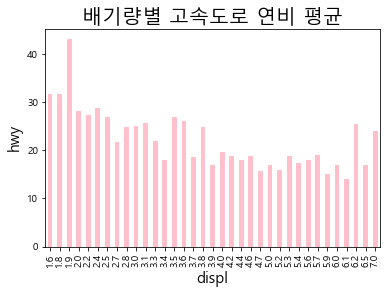

In [56]:
fig = plt.figure()

displ.plot(kind='bar', color='pink')
plt.title('배기량별 고속도로 연비 평균', size=20) 
plt.xlabel('displ', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 02]
- 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
- audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

In [57]:
audi = carDF[carDF['manufacturer'] == 'audi']['cty'].mean()
toyota = carDF[carDF['manufacturer'] == 'toyota']['cty'].mean()
print('Audi의 도시연비는 {}이고, Toyota의 도시연비는{}이다.'.format(audi, toyota))

Audi의 도시연비는 17.61111111111111이고, Toyota의 도시연비는18.529411764705884이다.


In [52]:
manu = carDF.groupby(carDF.manufacturer).agg(np.mean).loc[:, 'cty']

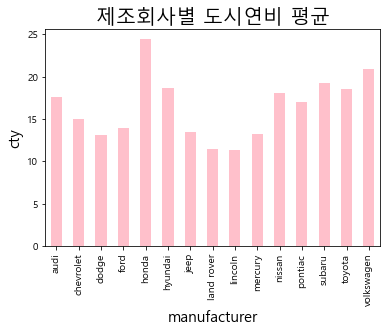

In [55]:
fig = plt.figure()

manu.plot(kind='bar', color='pink')
plt.title('제조회사별 도시연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()

### 문제 03]
- chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
- 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
- bar plot 이용한 시각화


- 데이터 전처리 : 연료가격 변수 추가(price_fl)
- c : 가스 2.35, d : 디젤 2.38, e : 에탄올 2.11 , p : 고급휘발유 2.76 , r : 보통휘발유 2.22


### 문제 04]
- 우리가 만든 연료 가격 프레임을 웝본 프레임에 병합

In [90]:
a = carDF.groupby(carDF.manufacturer)
for key , group in a :
    print('key : ' , key)
    print('number : ' , len(group))
    print(group)
    print('\n')



key :  audi
number :  18
   manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0          audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1          audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2          audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3          audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4          audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5          audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6          audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7          audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8          audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9          audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   28  p   
10         audi  a4 quattro    2.0  2008    4    auto(s6)   4   19   27  p   
11         audi  a4 quattro    2.8  199

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
74,ford,expedition 2wd,4.6,1999,8,auto(l4),r,11,17,r,suv
75,ford,expedition 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
81,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup


In [94]:
a.describe()

displ                                                       year  \
             count      mean           std  min    25%  50%    75%  max count   
manufacturer                                                                    
audi          18.0  2.544444  6.732032e-01  1.8  2.000  2.8  3.025  4.2  18.0   
chevrolet     19.0  5.063158  1.370406e+00  2.4  4.450  5.3  5.850  7.0  19.0   
dodge         37.0  4.378378  8.679910e-01  2.4  3.800  4.7  4.700  5.9  37.0   
ford          25.0  4.536000  5.407402e-01  3.8  4.000  4.6  4.600  5.4  25.0   
honda          9.0  1.711111  1.452966e-01  1.6  1.600  1.6  1.800  2.0   9.0   
hyundai       14.0  2.428571  3.646464e-01  2.0  2.100  2.4  2.650  3.3  14.0   
jeep           8.0  4.575000  1.015241e+00  3.0  3.925  4.7  4.950  6.1   8.0   
land rover     4.0  4.300000  2.581989e-01  4.0  4.150  4.3  4.450  4.6   4.0   
lincoln        3.0  5.400000  1.087792e-15  5.4  5.400  5.4  5.400  5.4   3.0   
mercury        4.0  4.400000  4.898979e-01  4.0  4.000  4.3  4.700  5.0   4.0   
nissan        13.0  3.269231  8.644696e-01  2.4  2.500  3.3  3.500  5.6  13.0   
pontiac        5.0  3.960000  8.080842e-01  3.1  3.800  3.8  3.800  5.3   5.0   
subaru        14.0  2.457143  1.089410e-01  2.2  2.500  2.5  2.500  2.5  14.0   
toyota        34.0  2.952941  9.313513e-01  1.8  2.250  2.7  3.400  5.7  34.0   
volkswagen    27.0  2.255556  4.431820e-01  1.8  2.000  2.0  2.500  3.6  27.0   

                           ...    cty         hwy                             \
                     mean  ...    75%   max count       mean       std   min   
manufacturer               ...                                                 
audi          2003.500000  ...  18.75  21.0  18.0  26.444444  2.175322  23.0   
chevrolet     2004.684211  ...  16.50  22.0  19.0  21.894737  5.108759  14.0   
dodge         2004.108108  ...  15.00  18.0  37.0  17.945946  3.574182  12.0   
ford          2002.600000  ...  15.00  18.0  25.0  19.360000  3.327662  15.0   
honda         2003.000000  ...  25.00  28.0   9.0  32.555556  2.554952  29.0   
hyundai       2004.142857  ...  19.75  21.0  14.0  26.857143  2.178819  24.0   
jeep          2005.750000  ...  15.00  17.0   8.0  17.625000  3.248626  12.0   
land rover    2003.500000  ...  12.00  12.0   4.0  16.500000  1.732051  15.0   
lincoln       2002.000000  ...  11.50  12.0   3.0  17.000000  1.000000  16.0   
mercury       2003.500000  ...  13.25  14.0   4.0  18.000000  1.154701  17.0   
nissan        2003.846154  ...  19.00  23.0  13.0  24.615385  5.091471  17.0   
pontiac       2002.600000  ...  18.00  18.0   5.0  26.400000  1.140175  25.0   
subaru        2004.142857  ...  20.00  21.0  14.0  25.571429  1.157868  23.0   
toyota        2002.705882  ...  21.00  28.0  34.0  24.911765  6.166221  15.0   
volkswagen    2002.666667  ...  21.00  35.0  27.0  29.222222  5.315676  23.0   

                                        
                25%   50%    75%   max  
manufacturer                            
audi          25.00  26.0  27.75  31.0  
chevrolet     17.00  23.0  26.00  30.0  
dodge         16.00  17.0  21.00  24.0  
ford          17.00  18.0  22.00  26.0  
honda         32.00  32.0  34.00  36.0  
hyundai       26.00  26.5  28.00  31.0  
jeep          16.25  18.5  19.25  22.0  
land rover    15.00  16.5  18.00  18.0  
lincoln       16.50  17.0  17.50  18.0  
mercury       17.00  18.0  19.00  19.0  
nissan        20.00  26.0  27.00  32.0  
pontiac       26.00  26.0  27.00  28.0  
subaru        25.00  26.0  26.00  27.0  
toyota        20.00  26.0  29.75  37.0  
volkswagen    26.00  29.0  29.00  44.0  

[15 rows x 40 columns]